In [1]:
%matplotlib inline

In [2]:
from galsize_models.measurements.measure_sdss_clustering import get_wp_measurements, write_umachine_ascii

In [3]:
from galsize_models.measurements import load_umachine_sdss_with_meert15
umachine_sdss, is_complete = load_umachine_sdss_with_meert15()

In [4]:
print(umachine_sdss.keys())

['ra', 'dec', 'z', 'bptclass', 'sm', 'sfr', 'specsfr', 'sm_fib', 'sfr_fib', 'specsfr_fib', 'withinr', 'eligiblehost', 'sm_complete', 'eligiblehost2', 'd4000', 'd4000_sub', 'd4000_n', 'd4000_n_sub', 'has_match', 'logM_mendel13', 'logMB_mendel13', 'logMD_mendel13', 'pps_mendel13', 'type_mendel13', 'deltaBD_mendel13', 'dr7_objID', 'has_meert15_match', 'r50_magr_kpc_meert15', 'Magr_tot_meert15', 'Magr_bulge_meert15', 'Magr_disk_meert15', 'gr_bulge_meert15', 'gr_disk_meert15', 'morph_type_T_meert15', 'gr_kcorr_meert15', 'bulge_to_total_rband_meert15']


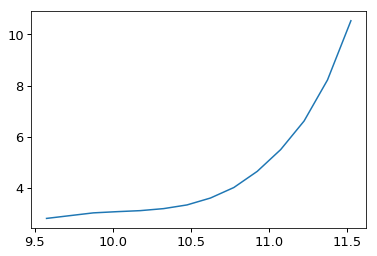

In [5]:
sm_bin_edges = np.arange(9.5, 11.5+0.15, 0.15)

sm_mids = 0.5*(sm_bin_edges[:-1] + sm_bin_edges[1:])

median_size = np.zeros_like(sm_mids)

for ism, sm_low, sm_high in zip(range(len(sm_mids)), sm_bin_edges[:-1], sm_bin_edges[1:]):
    mask = (umachine_sdss['sm'] >= sm_low) & (umachine_sdss['sm'] < sm_high)
    mask *= ~np.isnan(umachine_sdss['r50_magr_kpc_meert15'])
    
#     msg = "Number of galaxies in bin {0} with {1:.2f} < sm < {2:.2f} = {3}"
#     print(msg.format(ism, sm_low, sm_high, np.count_nonzero(mask)))
    median_size[ism] = np.median(umachine_sdss['r50_magr_kpc_meert15'][mask])
    
fig, ax = plt.subplots(1, 1)

__=ax.plot(sm_mids, median_size)

In [6]:
size_cut = np.interp(umachine_sdss['sm'], sm_mids, median_size)
low_size_mask = umachine_sdss['r50_magr_kpc_meert15'] < size_cut

In [7]:
import os
dirname = "/Users/aphearin/work/repositories/python/galsize_models/build/lib.macosx-10.9-x86_64-2.7"
low_sizes_fname = os.path.join(dirname, 'low_sizes.dat')
high_sizes_fname = os.path.join(dirname, 'high_sizes.dat')
write_umachine_ascii(umachine_sdss[low_size_mask], low_sizes_fname, overwrite=True)
write_umachine_ascii(umachine_sdss[~low_size_mask], high_sizes_fname, overwrite=True)

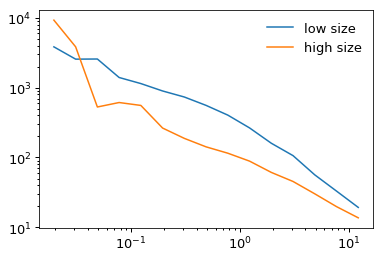

In [17]:

low_size_results = get_wp_measurements(low_sizes_fname, 9.75, 10.25, 20)
rp_low_size, wp_low_size, wperr_low_size = low_size_results[:, 0], low_size_results[:, 1], low_size_results[:, 2]

high_size_results = get_wp_measurements(high_sizes_fname, 9.75, 10.25, 20)
rp_high_size, wp_high_size, wperr_high_size = high_size_results[:, 0], high_size_results[:, 1], high_size_results[:, 2]

fig, ax = plt.subplots(1, 1)

ax.loglog()

__=ax.plot(rp_low_size, wp_low_size, label='low size')
__=ax.plot(rp_high_size, wp_high_size, label='high size')
legend = ax.legend()